In [11]:
dir_ = '/Users/goszk/Desktop/labs DM/CSWK/credit.data/'

In [12]:
import pandas as pd

In [13]:
train_data = pd.read_csv(dir_+'creditdefault_train.csv')

In [14]:
test_data = pd.read_csv(dir_+'creditdefault_test.csv')

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). <br>
X4: Marital status (1 = married; 2 = single; 3 = others). <br>
X5: Age (year). <br>
X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. <br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.<br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [15]:
train_data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [16]:
test_data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,150000,1,1,2,35,-1,-1,-1,-1,...,-3,780,0,0,9054,0,783,0,0,0
14996,0,140000,1,2,1,41,0,0,0,0,...,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000
14997,0,10000,1,3,1,43,0,0,0,-2,...,0,0,0,0,2000,0,0,0,0,0
14998,1,80000,1,2,2,34,2,2,2,2,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000


In [17]:
y_train = train_data['Y']
X_train = train_data.drop(['Y'],axis=1)

y_test = test_data['Y']
X_test = test_data.drop(['Y'],axis=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [19]:
X_train[0]

array([-0.97468354,  1.        , -0.33333333, -0.33333333, -0.88888889,
       -0.2       , -0.2       , -0.8       , -0.8       , -1.        ,
       -1.        , -0.96146514, -0.80887823, -0.92187843, -0.61225458,
       -0.85284065, -0.25217426, -1.        , -0.99887701, -1.        ,
       -1.        , -1.        , -1.        ])

In [20]:
'''
myConfMat takes in true labels (y_test), predictions (y_pred) and number of classes (classno).
It creates a matrix of zeros classno x classno.
Then it loops through all results and updates the confusion matrix, and outputs the updated matrix.
'''
def myConfMat(y_test,y_pred,classno):
    C= np.zeros((classno,classno)) # initialize the confusion matrix to zeros
    #loop through all results and update the confusion matrix
    for i in range(len(y_test)):
        C[y_test[i]][y_pred[i]] += 1
            
    return C

## Decision tree

In [21]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=10, n_jobs=4)
clf.fit(X=X_train, y=y_train)
best_tree_model = clf.best_estimator_
scores = clf.cv_results_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.8217333333333332 {'criterion': 'entropy', 'max_depth': 2}


In [22]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [23]:
len(scores['mean_test_score'])

36

In [24]:
gini = scores['params'][:18]
entropy = scores['params'][18:]

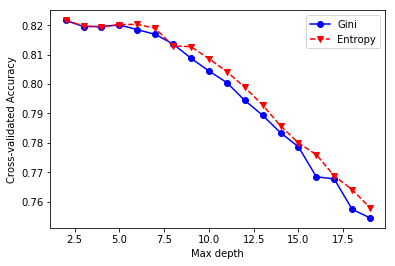

In [25]:
import matplotlib.pyplot as plt


plt.plot([x['max_depth'] for x in gini], scores['mean_test_score'][:18], 'bo-')
plt.plot([x['max_depth'] for x in entropy], scores['mean_test_score'][18:], 'rv--')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Cross-validated Accuracy')
plt.show()

In [26]:
predY = best_tree_model.predict(X_test)
predictions = pd.concat([y_test, pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,Y,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.817


In [28]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11181,   501],
       [ 2240,  1078]], dtype=int64)

In [29]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

0.32489451476793246

In [30]:
# precision
prec=tp/(tp+fp)
prec

0.6827105763141229

In [31]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

0.4402695527874209

In [32]:
# Accuracy is alright, but recall, precision, and f1 ...

## Random Forest

In [33]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_features':range(5,16), 'random_state':[0]}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=4)
rf.fit(X=X_train, y=y_train)
scores = rf.cv_results_
Rfmodel = rf.best_estimator_
print ('best accuracy and parameters are', rf.best_score_, rf.best_params_) 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


plt.plot([x['max_features'] for x in scores['params']], scores['mean_test_score'], 'bo-')
plt.xlabel('Max features')
plt.ylabel('Cross-validated Accuracy')
plt.show()

In [ ]:
parameters = {'max_features':range(5,16), 'random_state':[1]}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=4)
rf.fit(X=X_train, y=y_train)
scores = rf.cv_results_
Rfmodel = rf.best_estimator_
print ('best accuracy and parameters are', rf.best_score_, rf.best_params_) 

In [ ]:
import matplotlib.pyplot as plt


plt.plot([x['max_features'] for x in scores['params']], scores['mean_test_score'], 'bo-')
plt.xlabel('Max features')
plt.ylabel('Cross-validated Accuracy')
plt.show()

In [ ]:
predY = Rfmodel.predict(X_test)
predictions = pd.concat([y_test, pd.Series(predY,name='PredictedClass')], axis=1)
predictions

In [ ]:
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

In [ ]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

In [ ]:
# precision
prec=tp/(tp+fp)
prec

In [ ]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

## SVM

In [ ]:
# from sklearn.svm import SVC


# # parameters = {'max_features':range(5,16), 'random_state':[1]}
# # rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=4)
# # rf.fit(X=X_train, y=y_train)
# # scores = rf.cv_results_
# # Rfmodel = rf.best_estimator_
# # print ('best accuracy and parameters are', rf.best_score_, rf.best_params_) 

# C = [0.1, 0.2, 0.5, 0.8, 1, 5]
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# parameters = {'C' : C}

# clf = GridSearchCV(SVC(gamma = 'auto', kernel = 'rbf'), parameters, cv=10, n_jobs=4)
# clf.fit(X=X_train, y=y_train)
# scores = clf.cv_results_
# best_model = clf.best_estimator_
# print ('best accuracy and parameters are', clf.best_score_, clf.best_params_)

In [ ]:
from sklearn.svm import SVC

C = [0.2, 0.5, 0.8, 1, 5]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=1,kernel='rbf',gamma='auto')
    clf.fit(X_train[:1000], y_train[:1000])
    Y_predTrain = clf.predict(X_train[:1000])
    Y_predTest = clf.predict(X_test[:1000])
    SVMtrainAcc.append(accuracy_score(y_train[:1000], Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test[:1000], Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In [ ]:
import matplotlib.pyplot as plt


plt.plot([x['max_features'] for x in scores['params']], scores['mean_test_score'], 'bo-')
plt.xlabel('Max features')
plt.ylabel('Cross-validated Accuracy')
plt.show()